Импортируем нужные библтотеки

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

Открываем и смотрим датасет

In [4]:
data = pd.read_csv("pokemon.csv")
data.head()  

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

# Чистка данных
У некоторых покемонов есть значения NaN (нулевые значения) в столбце Тип 2

Некоторые покемоны имеют несколько форм, и эти формы включены в этот набор данных

В 7-м поколении тип Pokemon не начинается с заглавной буквы, как все предыдущие, Pandas будет считать это другим типом

### Используем только первую букву типа Pokemon:

In [6]:
data['type1'] = data['type1'].str.capitalize()
data['type2'] = data['type2'].str.capitalize()

### Убираем повторяющихся покемонов:

In [7]:
data.drop_duplicates('#', keep='first', inplace=True)

KeyError: Index(['#'], dtype='object')

### Заменяем наны на нули в колонне 'type2'

In [9]:
data['type2'].fillna(value='None', inplace=True)

Так то лучше!

In [18]:
colours = ["aqua", "orange"]
g = sns.factorplot(
    x='type 1', 
    data1=data,
    kind='count', 
    hue='LEGENDARY',
    palette=colours, 
    size=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('type 1', '# of Pokemon')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['NOT LEGENDARY','LEGENDARY'])
plt.show()

ValueError: Could not interpret input 'type 1'

# Какой покемон самый сильный и какой самый слабый?

In [22]:
print('Cамый сильный покемон: \t \t'+ "\033[1m" + '{}'.format(data.name[data['attack'].idxmax()] ) + "\033[0;0m")
print('Самый слабый покемон: \t \t'+ "\033[1m" + '{}'.format(data.name[data['attack'].idxmin()] ) + "\033[0;0m")
print('\n')

Cамый сильный покемон: 	 	Heracross
Самый слабый покемон: 	 	Chansey




# Вероятность какого вида покемонов быть легендарным самая высокая?

### Если допустить, что под "видом" понимается поколение (т.к. для имени бессмысленно считать, а колонки вид нет), то можно сделать следующие выводы:

(И прошу прощения, если это не так, я совсем не разбираюсь в покемонах!)

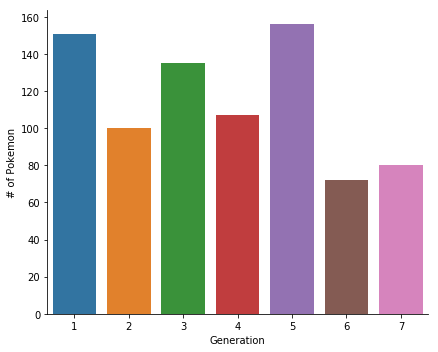

In [28]:
sns.factorplot(   #строим распределение для поколений
    x='generation', 
    data=data,
    size=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

## А сколько у нас всего легендарных покемонов?

In [14]:
data['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

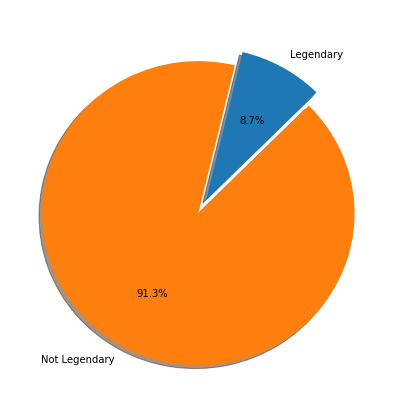

In [16]:
fig = plt.figure(figsize=(7,7))


is_leg = data[data['is_legendary']==True]
aint_l = data[data['is_legendary']==False]

leg_dist = [is_leg['name'].count(), aint_l['name'].count()]
leg_pie = plt.pie(leg_dist,
                 labels= ['Legendary', 'Not Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 startangle = 45,
                 explode=(0, 0.1))

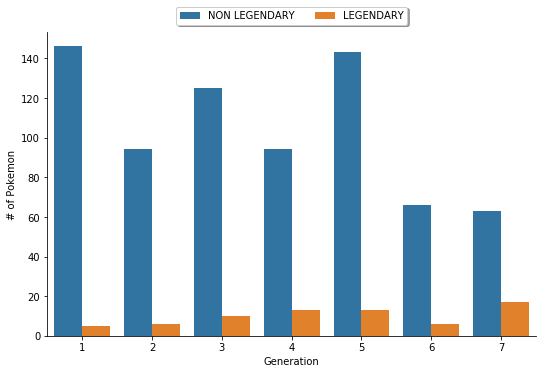

In [31]:
g = sns.factorplot(
    x='generation', 
    data=data,
    kind='count', 
    hue='is_legendary',
    size=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Generation', '# of Pokemon')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['NON LEGENDARY','LEGENDARY'])
plt.show()

Судя по всему, в 7 поколении процент легендарных покемонов максимальный

# Постройте классификатор, отвечающий на вопрос 'является ли покемон легендарным?'.

Будем предсказывать на основании двух показателей: 'Base Total' и 'Catch Rate'

In [36]:
leg = data[data['is_legendary'] == True]
data['capture_rate'].set_value(773, '30')


C:\Users\Tatiana\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


0       45
1       45
2       45
3       45
4       45
5       45
6       45
7       45
8       45
9      255
10     120
11      45
12     255
13     120
14      45
15     255
16     120
17      45
18     255
19     127
20     255
21      90
22     255
23      90
24     190
25      75
26     255
27      90
28     235
29     120
      ... 
771      3
772      3
773     30
774     45
775     70
776    180
777     45
778     80
779     70
780     25
781     45
782     45
783     45
784      3
785      3
786      3
787      3
788     45
789     45
790     45
791     45
792     45
793     25
794    255
795     30
796     25
797    255
798     15
799      3
800      3
Name: capture_rate, Length: 801, dtype: object

In [37]:
leg_total = leg['base_total'].mean()
non_leg_total = data[data['is_legendary'] != True]['base_total'].mean()

In [38]:
pd.DataFrame([leg_total, non_leg_total], index=['Legendary', 'non-Legendary'], columns=['Average Total'])

,Average Total
Legendary,615.257143
non-Legendary,410.481532


In [39]:
isLegendary = pd.get_dummies(data['is_legendary'], drop_first=True)
lr_df = data[['base_total', 'capture_rate']]
lr_df = pd.concat([lr_df, isLegendary], axis=1)

In [40]:
lr_df.columns = ['Base Total', 'Catch Rate', 'Is Legendary']
lr_df.head()

,Base Total,Catch Rate,Is Legendary
0,318,45,0
1,405,45,0
2,625,45,0
3,309,45,0
4,405,45,0


In [41]:
X = lr_df.drop('Is Legendary', axis = 1)
y = lr_df['Is Legendary']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
pred = LR.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       229
          1       1.00      0.92      0.96        12

avg / total       1.00      1.00      1.00       241



# Готово!